In [1]:
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

from rna_learn.model import (
    rnn_classification_model,
    compile_classification_model,
)
from rna_learn.transform import (
    sequence_embedding, 
    make_dataset_balanced,
    one_hot_encode_classes,
    normalize, 
    denormalize,
)
from rna_learn.load import load_rna_structure_dataset

In [2]:
np.random.seed(444)

sns.set(palette='colorblind', font_scale=1.3)

## Model

In [3]:
alphabet = ['.', '(', ')']
alphabet_size = len(alphabet)

model = rnn_classification_model(alphabet_size=alphabet_size, n_categories=4)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequence (InputLayer)        [(None, None, 3)]         0         
_________________________________________________________________
masking (Masking)            (None, None, 3)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               41600     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 52,104
Trainable params: 52,104
Non-trainable params: 0
_________________________________________________________

## Data

In [4]:
%%time
metadata = pd.read_csv('data/tab/mrna.tab', delimiter='\t')
metadata['category'] = metadata['temp.cat']

sequences = load_rna_structure_dataset(metadata, 'data/seq/')

CPU times: user 593 ms, sys: 295 ms, total: 888 ms
Wall time: 890 ms


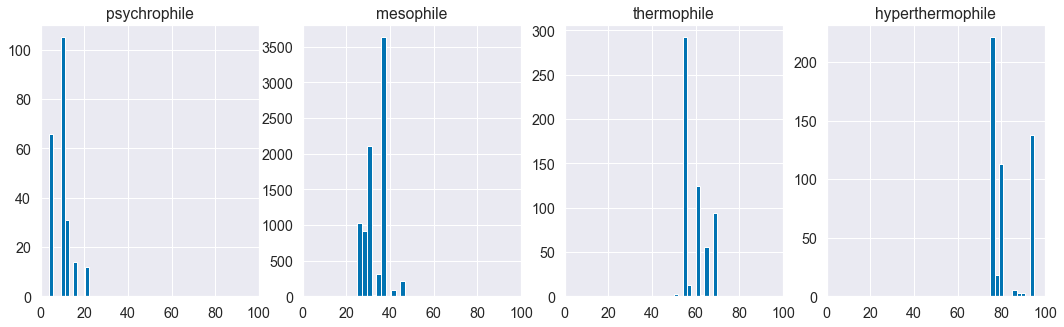

In [5]:
def rna_type_distributions(metadata):
    f, axes = plt.subplots(1, 4, figsize=(18, 5))
    axes = axes.flatten()
    for i, rna_type in enumerate(['psychrophile', 'mesophile', 'thermophile', 'hyperthermophile']):
        metadata[metadata['rna.type'] == rna_type]['temp'].hist(ax=axes[i])
        axes[i].set_title(f'{rna_type}');
        axes[i].set_xlim(0, 100)

rna_type_distributions(metadata)

In [6]:
for i, rna_type in enumerate(['psychrophile', 'mesophile', 'thermophile', 'hyperthermophile']):
    print(rna_type, len(metadata[metadata['rna.type'] == rna_type]))

psychrophile 228
mesophile 8312
thermophile 583
hyperthermophile 501


In [7]:
y_balanced, balanced_metadata = make_dataset_balanced(metadata)

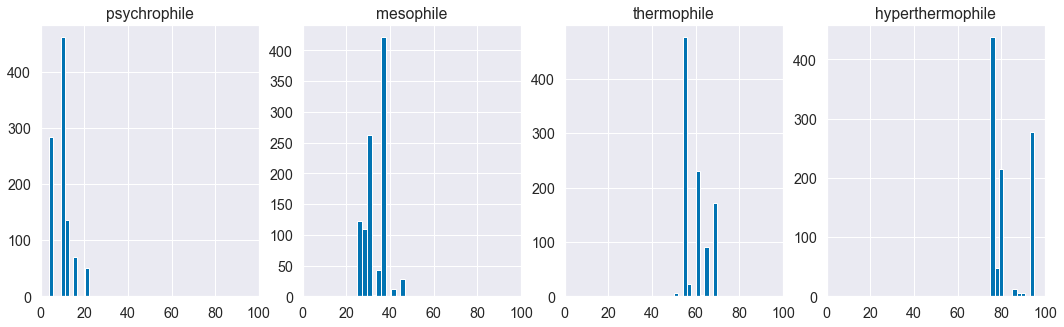

In [8]:
rna_type_distributions(balanced_metadata)

In [9]:
classes = ['psychrophile', 'mesophile', 'thermophile', 'hyperthermophile']
one_hot_encode_classes(y_balanced, classes)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)